# make some fake Data
## this generates some simulated data for use with the MoodCube Synapse
### data is packaged to be used for reinforcement learning in the JellyFish

In [43]:
%matplotlib inline

from __future__ import division
import matplotlib.cm as cm
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
#import os
#import scipy.constants as scc
from scipy.io import savemat
from scipy.stats import rayleigh
#import scipy.signal as sig
#import sys
from timeit import default_timer as timer

#import tensorflow as tf
#from keras.models import Sequential
#from keras.layers import Dense, Activation

# Now alter my matplotlib parameters 
rcParams.update({'axes.grid': True,
                 'figure.facecolor': 'sienna',
                 'axes.facecolor': 'black',
                     'font.family': 'serif',
                     'font.size': 8,
                     'font.serif': 'Palatino Linotype',
                     'grid.color': 'grey',
                     'grid.linestyle': '-',
                     'grid.alpha': 0.5,
                     'grid.linewidth': 1,
                     'legend.borderpad': 0.2,
                     'legend.fancybox': True,
                     'legend.fontsize': 8,
                     'legend.framealpha': 0.7,
                     'legend.handletextpad': 0.1,
                     'legend.labelspacing': 0.2,
                     'legend.loc': 'best',
                     'lines.linewidth': 1.5,
                     'savefig.bbox': 'tight',
                     'savefig.pad_inches': 0.02,
                     'savefig.dpi': 200,
                     'text.usetex': False,
                     'text.latex.preamble': r'\usepackage{txfonts}',
                     'figure.figsize': (7,4),
                     })


### Functions to make simulated Raspberry Pi data

In [45]:
# temeprature sensorss
def TemperatureData(t, T_0, dT):
    T = T_0 * np.ones_like(t)   # average temperature is T_0 [deg C]
    for ii in range(len(T)):
        deltaT = np.random.normal(0, dT/100)
        T[ii] = T[ii-1] + deltaT
    
    return T

# random distance data from N UltraSonic proximity sensors
def ProximityData(t, d_0, dx, N):
    # average distance = d_0
    # movement scale is dx
    # number of prox sensors = N
    d = d_0 * np.ones((len(t), N))   # average distance is d_0 [m]
    for ii in range(len(t)):
        for jj in range(N):
            deltaX = np.random.normal(0, dx/100)
            d[ii,jj] = d[ii-1,jj] + deltaX
    
    return d

# simulate the spectral BL-MS output of a microphone
def AudioSpectrumData(t, Nbands):
    # Nbands = # of frequency bands
    npts = len(t)
    blms = np.zeros((npts, Nbands))
    for jj in range(Nbands):
        blms[:,jj] = rayleigh.rvs(size = npts)
    
    return blms

### plot the fake data

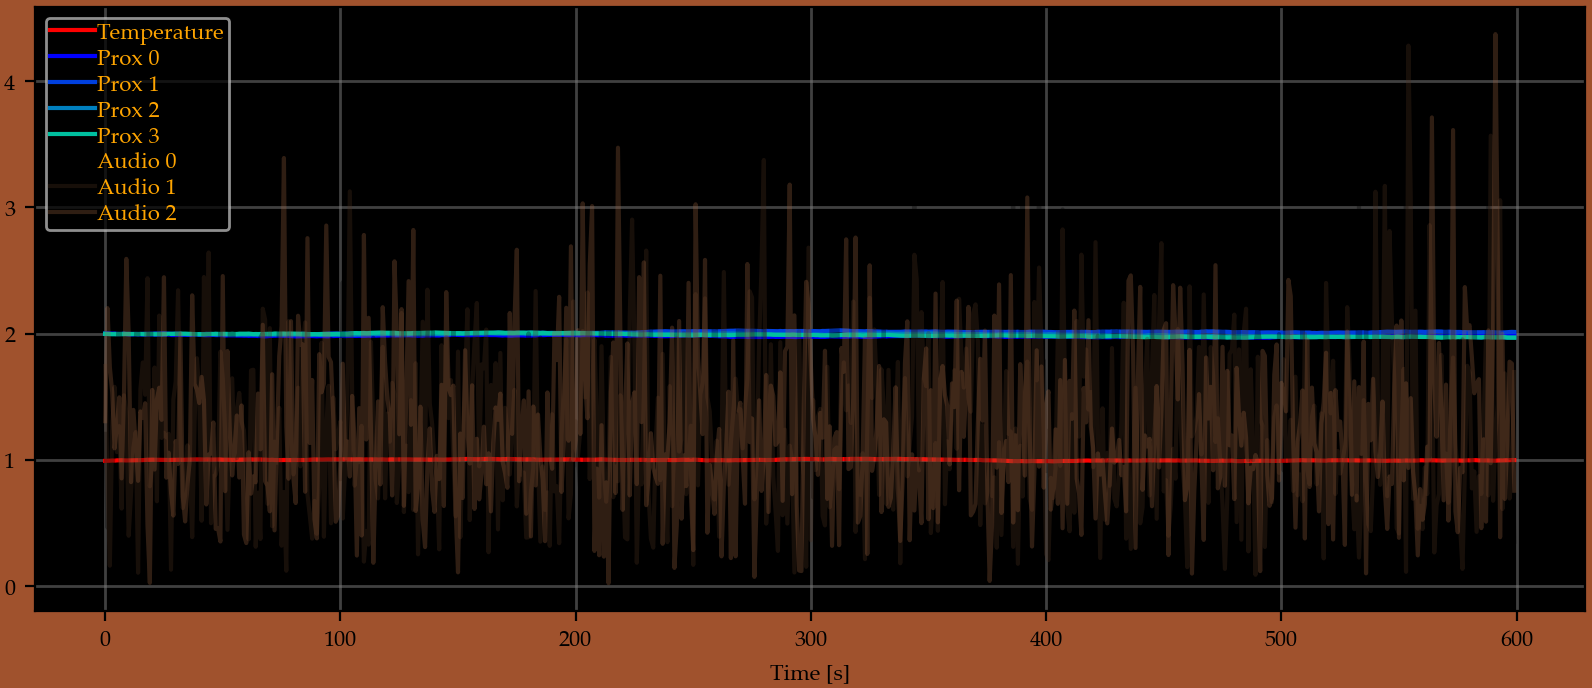

In [47]:
fsample = 1     # [Hz]
dur = 10 * 60   # seconds
tt = np.arange(start=0, stop=dur, step=1/fsample)

Nprox = 4
Nbands = 3

T    = TemperatureData(tt, 25, 2)
ds   = ProximityData(tt, 2, 0.1, Nprox)
blms = AudioSpectrumData(tt, Nbands)

plt.figure(figsize=(10,4))
cmap = cm.get_cmap('winter')

plt.plot(tt, T/np.median(T), color='Red', label='Temperature')

cmap = cm.get_cmap('winter')
for pp in range(Nprox):
    plt.plot(tt, ds[:,pp], c=cmap(pp/4),label='Prox ' + str(pp))

cmap = cm.get_cmap('copper')
for pp in range(Nbands):
    plt.plot(tt, blms[:,pp], c=cmap(pp/4), label='Audio ' + str(pp), alpha=0.3)

#plt.ylim([9, 2000])
#plt.xlim([0,30])
plt.xlabel('Time [s]')
legg = plt.legend()
for text in legg.get_texts():
    plt.setp(text, color = 'orange')
plt.show()

In [ ]:
# save ome data

In [19]:
np.ones(len(tt),4)

TypeError: data type not understood

In [6]:
fsample=1

In [ ]:
data['chans']

In [ ]:
blrms[:,k].max()

In [ ]:
ii = np.where(blrms[:,k] > 0)
ii[0].shape

In [ ]:
h_pred